In [113]:
import requests
import pprint

In [114]:
pp = pprint.PrettyPrinter(indent=2)

In [149]:
song_list = None
with open("data/cooking_songs.txt") as f:
    song_list = [x.rstrip() for x in f.readlines()]
song_list[:10]

['track:Happiness artist:DARGZ',
 'track:Be There for you artist:Cartoons',
 'track:Groceries artist:Cartoons',
 'track:Mas Que Nada artist:Sergio Mendes']

In [126]:
def return_song_dump(song_name):
    data = {'name': song_name}
    response = requests.post('http://localhost:3000/search', json=data)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print('Request failed with status code:', response.status_code)
        return -1

In [127]:
def extract_info(dump):
    song_info = {}
    # pp.pprint(dump)
    song_info["artists"] = ", ".join([x['name'] for x in dump['artists']])
    song_info["song_id"] = dump['id']
    song_info["popularity"] = dump['popularity']
    song_info["spotify_link"] = dump['external_urls']['spotify']
    song_info["release_date"] = dump['album']['release_date']
    # song_info["genres"] = dump['album']['genres']

    
    return song_info

In [128]:
song_data = {}

for idx, song_name in enumerate(song_list):
    dump = return_song_dump(song_name)
    song_data[idx] = extract_info(dump[0])
    song_data[idx]['name'] = song_name
    pp.pprint(dump[0])

{ 'album': { 'album_group': 'single',
             'album_type': 'single',
             'artists': [ { 'external_urls': { 'spotify': 'https://open.spotify.com/artist/78rUTD7y6Cy67W1RVzYs7t'},
                            'href': 'https://api.spotify.com/v1/artists/78rUTD7y6Cy67W1RVzYs7t',
                            'id': '78rUTD7y6Cy67W1RVzYs7t',
                            'name': 'PinkPantheress',
                            'type': 'artist',
                            'uri': 'spotify:artist:78rUTD7y6Cy67W1RVzYs7t'},
                          { 'external_urls': { 'spotify': 'https://open.spotify.com/artist/3LZZPxNDGDFVSIPqf4JuEf'},
                            'href': 'https://api.spotify.com/v1/artists/3LZZPxNDGDFVSIPqf4JuEf',
                            'id': '3LZZPxNDGDFVSIPqf4JuEf',
                            'name': 'Ice Spice',
                            'type': 'artist',
                            'uri': 'spotify:artist:3LZZPxNDGDFVSIPqf4JuEf'}],
             'available_mar

In [129]:
def extract_song_features(song_id):
    params = {'id': song_id}
    response = requests.get('http://localhost:3000/features', params=params)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print('Request failed with status code:', response.status_code)
        return -1

In [130]:
song_data[0]

{'artists': 'PinkPantheress, Ice Spice',
 'song_id': '6AQbmUe0Qwf5PZnt4HmTXv',
 'popularity': 98,
 'spotify_link': 'https://open.spotify.com/track/6AQbmUe0Qwf5PZnt4HmTXv',
 'release_date': '2023-02-03',
 'name': "Boy's a Liar"}

## plotting here


In [133]:
# keys = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
valence = []

for idx, song in song_data.items():
    features = extract_song_features(song['song_id'])
    print(features)
    
    if(features == -1):
        print("error")
        continue
    acousticness.append(features['acousticness'])
    danceability.append(features['danceability'])
    energy.append(features['energy'])
    instrumentalness.append(features['instrumentalness'])
    liveness.append(features['liveness'])
    loudness.append(features['loudness'])
    speechiness.append(features['speechiness'])
    tempo.append(features['tempo'])
    valence.append(features['valence'])

    try:
        for k, v in features.items():
            if k not in song:
                song[k] = v
                print("aa")
    except AttributeError:
        print(song)

{'danceability': 0.696, 'energy': 0.809, 'key': 5, 'loudness': -8.254, 'mode': 1, 'speechiness': 0.05, 'acousticness': 0.252, 'instrumentalness': 0.000128, 'liveness': 0.248, 'valence': 0.857, 'tempo': 132.962, 'type': 'audio_features', 'id': '6AQbmUe0Qwf5PZnt4HmTXv', 'uri': 'spotify:track:6AQbmUe0Qwf5PZnt4HmTXv', 'track_href': 'https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5PZnt4HmTXv', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6AQbmUe0Qwf5PZnt4HmTXv', 'duration_ms': 131013, 'time_signature': 4}
{'danceability': 0.737, 'energy': 0.846, 'key': 1, 'loudness': -4.51, 'mode': 0, 'speechiness': 0.22, 'acousticness': 0.00614, 'instrumentalness': 0, 'liveness': 0.0486, 'valence': 0.546, 'tempo': 87.981, 'type': 'audio_features', 'id': '0e8nrvls4Qqv5Rfa2UhqmO', 'uri': 'spotify:track:0e8nrvls4Qqv5Rfa2UhqmO', 'track_href': 'https://api.spotify.com/v1/tracks/0e8nrvls4Qqv5Rfa2UhqmO', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0e8nrvls4Qqv5Rfa2UhqmO', 'duration_ms':

In [134]:
song_data[0]

{'artists': 'PinkPantheress, Ice Spice',
 'song_id': '6AQbmUe0Qwf5PZnt4HmTXv',
 'popularity': 98,
 'spotify_link': 'https://open.spotify.com/track/6AQbmUe0Qwf5PZnt4HmTXv',
 'release_date': '2023-02-03',
 'name': "Boy's a Liar",
 'danceability': 0.696,
 'energy': 0.809,
 'key': 5,
 'loudness': -8.254,
 'mode': 1,
 'speechiness': 0.05,
 'acousticness': 0.252,
 'instrumentalness': 0.000128,
 'liveness': 0.248,
 'valence': 0.857,
 'tempo': 132.962,
 'type': 'audio_features',
 'id': '6AQbmUe0Qwf5PZnt4HmTXv',
 'uri': 'spotify:track:6AQbmUe0Qwf5PZnt4HmTXv',
 'track_href': 'https://api.spotify.com/v1/tracks/6AQbmUe0Qwf5PZnt4HmTXv',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6AQbmUe0Qwf5PZnt4HmTXv',
 'duration_ms': 131013,
 'time_signature': 4}

In [76]:
import json

In [78]:
with open('data/workout_data.json', 'w') as f:
    json.dump(song_data, f, indent=2)

In [79]:
with open('data/workout_data.json') as f:
    songs_data = json.load(f)

In [80]:
key_scale = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]

In [81]:
def process_song_data(data):
    data['mode'] = "Major" if data['mode'] == 1 else "Minor"
    data['key'] = key_scale[int(data['key'])]
    data['duration'] = data['duration_ms']/1000/60
    data.pop('duration_ms')

In [82]:
for key, data in songs_data.items():
    try:
        process_song_data(data)
    except KeyError:
        print(data)

In [84]:
with open('data/workout_data_processed.json', 'w') as f:
    json.dump(songs_data, f, indent=2)

### Hardstyle

In [96]:
with open('hardstylealbum.json') as f:
    hard_songs_data = json.load(f)
hard_songs_data["items"][0]

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4qxavzpYzPfrDLShcWaPb6'},
   'href': 'https://api.spotify.com/v1/artists/4qxavzpYzPfrDLShcWaPb6',
   'id': '4qxavzpYzPfrDLShcWaPb6',
   'name': 'Mapo Mester',
   'type': 'artist',
   'uri': 'spotify:artist:4qxavzpYzPfrDLShcWaPb6'}],
 'available_markets': [],
 'disc_number': 1,
 'duration_ms': 291310,
 'explicit': False,
 'external_urls': {'spotify': 'https://open.spotify.com/track/02Hp7rsuCsGW0GmB4NZKLC'},
 'href': 'https://api.spotify.com/v1/tracks/02Hp7rsuCsGW0GmB4NZKLC',
 'id': '02Hp7rsuCsGW0GmB4NZKLC',
 'is_local': False,
 'name': 'Hey - Hard Mix',
 'preview_url': None,
 'track_number': 1,
 'type': 'track',
 'uri': 'spotify:track:02Hp7rsuCsGW0GmB4NZKLC'}

In [99]:
ids = "["
for song in hard_songs_data["items"]:
    ids += song["id"] + ","
ids = ids[:-1] + "]"
ids

'[02Hp7rsuCsGW0GmB4NZKLC,54ZD1YGQPXvbwAHcMthlPC,4IWMv2R6UhOLPmttRFH71x,7BzcvODbJ09MUprieeyDOg,53yYY7jvIQCkPOeVASIasv,3QWyB8KKVNGdAHXU3u4puz,6W43pbN6K4bAHfblQL3JNU,2U0hU8k7Yr1JouQQ1STkVD,3dtmMWgMfNyODj9bSyAeYU,4iFlL6W7V0Zfp9XcvcUZYJ,1v15i2awl1SDXR6VUj7Ugv,6Xze6OGwjBmDHfIU4DPFGg,5LUAtU9YANXGFPV2jDPQ1B,3L48ZYksYICY8nCV3ExfCf,5iFjLdtGko4E13lepPdxPq,16PhDlskQOvLh0Fs8P866y,1anshtszGkpGu2ZfvTXJmj,5hw5nyWTFgTTxRAfuDZMnO,6RXu3gFUdLQUxExKlsgrQf,3xjPWrRODVfrjmOo4hGggS]'

## plots

In [110]:
import matplotlib.pyplot as plt

In [135]:
acousticness

[0.252,
 0.00614,
 0.321,
 0.0252,
 0.299,
 0.0855,
 0.264,
 0.0168,
 0.00456,
 0.945,
 0.25,
 0.304,
 0.0119,
 0.0476,
 0.422,
 0.0995,
 0.0755,
 0.284,
 0.797,
 0.692,
 0.00146,
 0.293,
 0.0203,
 0.458,
 0.234,
 0.0158,
 0.00843,
 0.264,
 0.334,
 0.0104,
 0.831,
 0.145,
 0.524,
 0.0078,
 0.305,
 0.894,
 0.0252,
 0.39,
 0.0533,
 0.0177,
 0.414,
 0.152,
 0.0388,
 0.64,
 0.692,
 0.0392,
 0.538,
 0.0123,
 0.0591,
 0.0174,
 0.0316,
 0.315,
 0.129,
 0.345,
 0.00261,
 0.0465,
 0.0142,
 0.112,
 0.255,
 0.108,
 0.0155,
 0.177,
 0.239,
 0.731,
 0.00275,
 0.00567,
 0.0384,
 0.186,
 0.104,
 0.147,
 0.00534,
 0.568,
 0.178,
 0.281,
 0.759,
 0.295,
 0.0202,
 0.207,
 0.119,
 0.0576,
 0.00281,
 0.00252,
 0.018,
 0.33,
 0.0791,
 0.238,
 0.657,
 0.00142,
 0.0128,
 0.00472,
 0.0801,
 0.411,
 0.167,
 0.0216,
 0.0371,
 0.236,
 0.0512,
 0.546,
 0.284,
 0.099,
 0.477,
 0.751,
 0.733,
 0.0166,
 0.0188,
 0.2,
 0.26,
 0.314,
 0.00608,
 0.269,
 0.556,
 0.0165,
 3.26e-05,
 0.544,
 0.0408,
 0.013,
 0.216,
 0.469

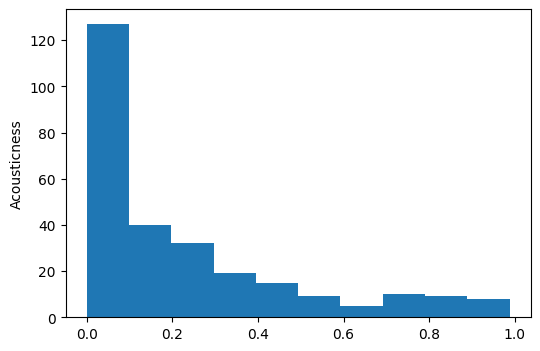

In [148]:
fig, ax = plt.subplots(figsize = (6,4))
plt.hist(acousticness)
ax.set_ylabel("Acousticness")

plt.show() 

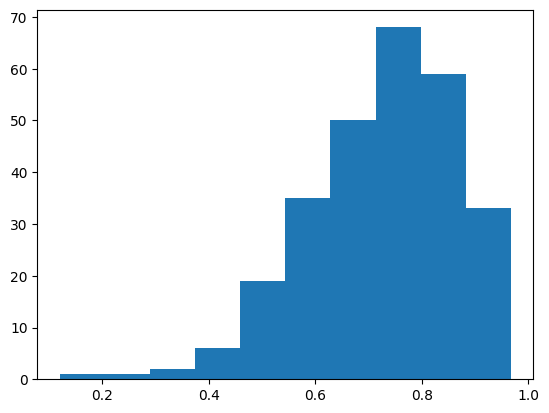

In [137]:
plt.hist(danceability)
plt.show() 

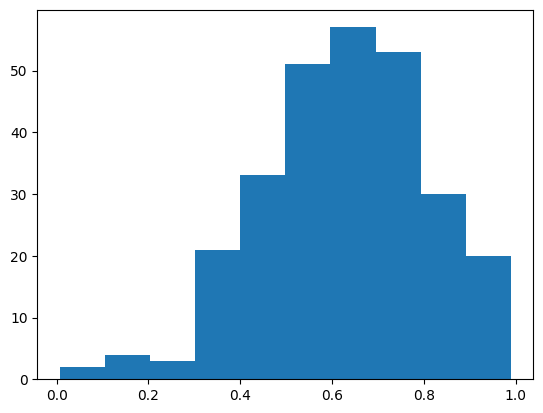

In [138]:
plt.hist(energy)
plt.show() 

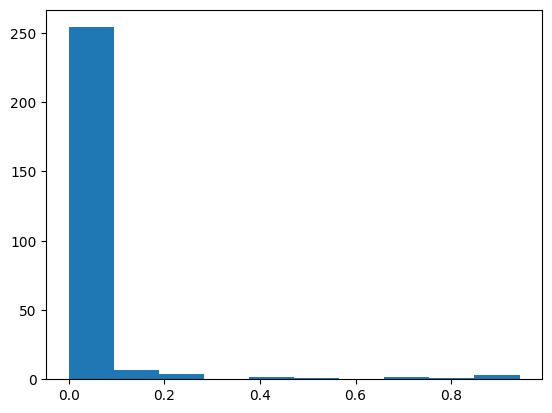

In [139]:
plt.hist(instrumentalness)
plt.show()

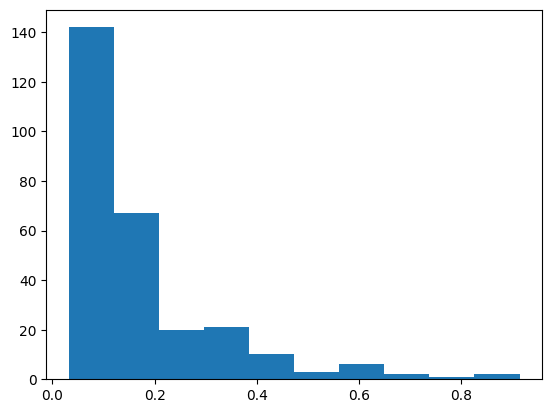

In [141]:
plt.hist(liveness)
plt.show()

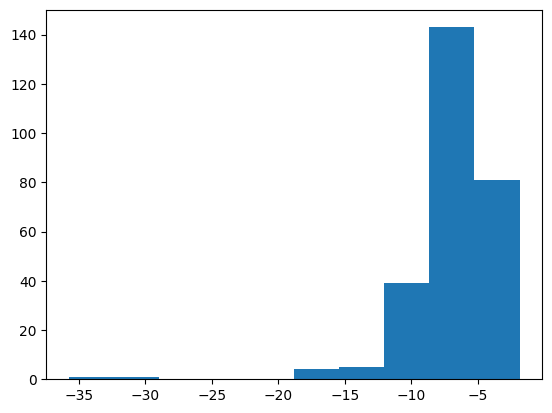

In [142]:
plt.hist(loudness)
plt.show()

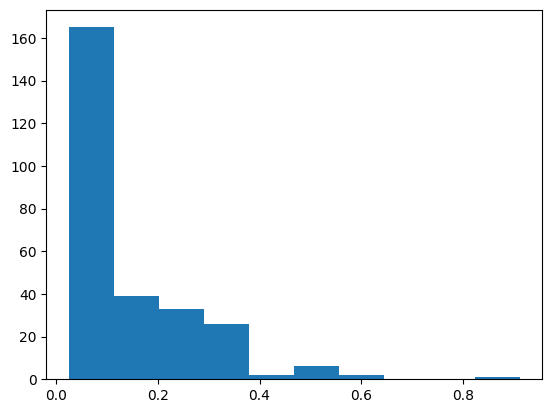

In [143]:
plt.hist(speechiness)
plt.show()

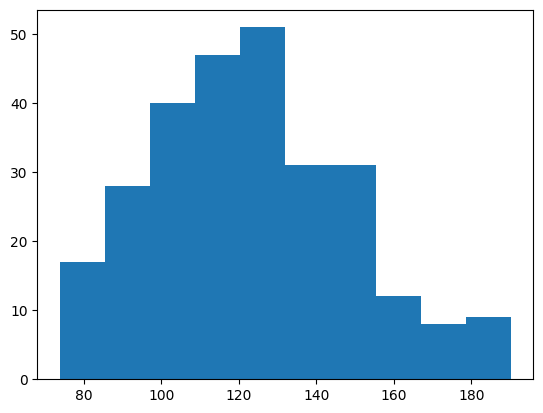

In [144]:
plt.hist(tempo)
plt.show()